# Multiclass Image Classification

In [1]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
#Load the CIFAR10 dataset into memory
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(type(X_train))

170498071/170498071 [==============================] - 74s 0us/step
<class 'numpy.ndarray'>


In [3]:
#Prints the shape of dataset
print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

X train: (50000, 32, 32, 3)
X test: (10000, 32, 32, 3)
y train: (50000, 1)
y test: (10000, 1)


In [4]:
#Re-shape train dataset
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [5]:
#Display the reshaped dataset
print(f"y_train after reshaping: {y_train.shape}")
print(f"y_test after reshaping: {y_test.shape}")

y_train after reshaping: (50000,)
y_test after reshaping: (10000,)


In [9]:
#Define classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck",]

In [6]:
def display_image(X, y, index):
    # Create a new figure for plotting (15x2 sq. in. size)
    plt.figure(figsize=(15, 2))

    # Display an image from X (dataset) at specified index
    plt.imshow(X[index])

    # Label the image using the `classes` list
    plt.xlabel(classes[y[index]])

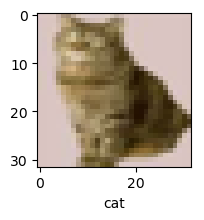

In [10]:
#Display image which helds index of 12225
display_image(X_train, y_train, 12225)

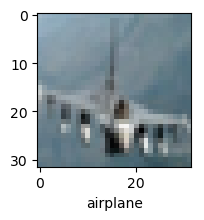

In [11]:
display_image(X_train, y_train, 12257)

In [12]:
#Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
#View data after normalizaton
X_train[:3]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Build an ANN

In [14]:
#Building an ANN
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(3000, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [15]:
#Compile the model
ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [16]:
#Train the dataset
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8166 - accuracy: 0.3500
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6270 - accuracy: 0.4253
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5441 - accuracy: 0.4556
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4823 - accuracy: 0.4774
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4326 - accuracy: 0.4964
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3911 - accuracy: 0.5102
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3522 - accuracy: 0.5236
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3184 - accuracy: 0.5376
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2846 - accuracy: 0.5506
Epoch 10/10
1563/1563 [==============================] - 22s 14m

In [23]:
#Evaluate performance of ANN
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4443 - accuracy: 0.4820


[1.4442898035049438, 0.4819999933242798]

## Build a CNN

In [17]:
cnn = models.Sequential(
    [
        # First convolutional block
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        # Second convolutional block
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten layer
        layers.Flatten(),

        # Dense block
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ]
)

In [18]:
#Configure the model
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [20]:
#Train the model
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4163 - accuracy: 0.4904
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0872 - accuracy: 0.6186
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9582 - accuracy: 0.6671
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8680 - accuracy: 0.6998
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8037 - accuracy: 0.7189
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7367 - accuracy: 0.7413
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6889 - accuracy: 0.7593
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6361 - accuracy: 0.7771
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5913 - accuracy: 0.7908
Epoch 10/10
1563/1563 [==============================] - 17s 11ms

In [21]:
#Evaluate the performance of CNN
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9251 - accuracy: 0.7021


[0.9251053929328918, 0.7020999789237976]